# **Predicting House Prices: Exploratory Data Analysis and Linear Regression Modeling**

Welcome to this comprehensive tutorial on predicting house prices using Exploratory Data Analysis (EDA) and Linear Regression modeling in Jupyter Notebook. 

In this tutorial, you'll learn step-by-step how to analyze a housing dataset and build a predictive model that estimates house prices based on key features.

Whether you're a beginner or an experienced data enthusiast, this tutorial will equip you with the skills to tackle real-world prediction tasks.

# What is linear Regression?

Linear regression is a fundamental statistical method used to model the relationship between two variables.

It helps us understand how changes in one variable can predict or explain changes in another. 

In the context of predicting house prices, linear regression would aim to draw a line that best fits the data points representing house areas and their corresponding prices. This line could then be used to predict prices for houses with different areas.

# **Dataset - Features(Columns) Description**

- 'price': The price of the house (target variable).
- 'area': The area or size of the house in square feet.
- 'bedrooms': The number of bedrooms in the house.
- 'bathrooms': The number of bathrooms in the house.
- 'stories': The number of stories or floors in the house.
- 'mainroad': Categorical variable indicating whether the house is located near the main road or not.
- 'guestroom': Categorical variable indicating whether the house has a guest room or not.
- 'basement': Categorical variable indicating whether the house has a basement or not.
- 'hotwaterheating': Categorical variable indicating whether the house has hot water heating or not.
- 'airconditioning': Categorical variable indicating whether the house has air conditioning or not.
- 'parking': The number of parking spaces available with the house.
- 'prefarea': Categorical variable indicating whether the house is in a preferred area or not.
- 'furnishingstatus': The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).

# **Importing the required libraries**

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score 

# **Importing our dataset**

In [38]:
data = pd.read_csv('Housing.csv')  

# Displaying the first few rows of the DataFrame 'data' 
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [39]:
# Displaying our data from the end
data.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# **Understanding our data**

In [40]:
# Shape of our data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (545, 13)


In [41]:
# Identifying information about composition and potential data quality
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [42]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

#### **Columns or Features Description**

- 'price': The price of the house (target variable).
- 'area': The area or size of the house in square feet.
- 'bedrooms': The number of bedrooms in the house.
- 'bathrooms': The number of bathrooms in the house.
- 'stories': The number of stories or floors in the house.
- 'mainroad': Categorical variable indicating whether the house is located near the main road or not.
- 'guestroom': Categorical variable indicating whether the house has a guest room or not.
- 'basement': Categorical variable indicating whether the house has a basement or not.
- 'hotwaterheating': Categorical variable indicating whether the house has hot water heating or not.
- 'airconditioning': Categorical variable indicating whether the house has air conditioning or not.
- 'parking': The number of parking spaces available with the house.
- 'prefarea': Categorical variable indicating whether the house is in a preferred area or not.
- 'furnishingstatus': The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).

In [43]:
# To show statistical summary of the columns of our data
data.describe(include ='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


# **Checking NULL Values**

In [44]:
# To count the null values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The inference we can make after checking for null values and finding that there are no null values in any of the columns is that the dataset is complete in terms of missing values. 

Having no null values is beneficial because it allows us to work with the entire dataset without the need for imputation or handling missing data. We can proceed with further data analysis, visualization, and modeling.

# **Performing EDA**


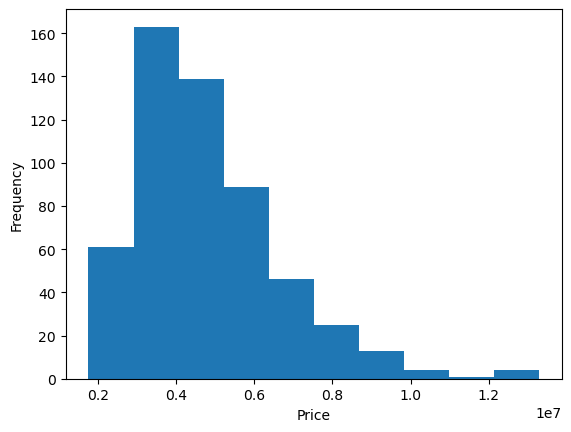

In [45]:
# Histogram of 'price'
plt.hist(data['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

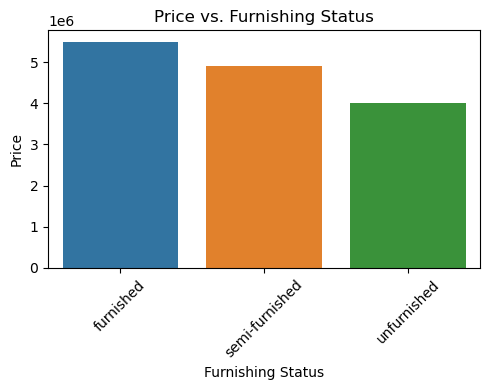

In [46]:
#'price' vs. 'furnishingstatus'
plt.figure(figsize=(5,4))
sns.barplot(data=data, x='furnishingstatus', y='price', errorbar=None)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Price vs. Furnishing Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

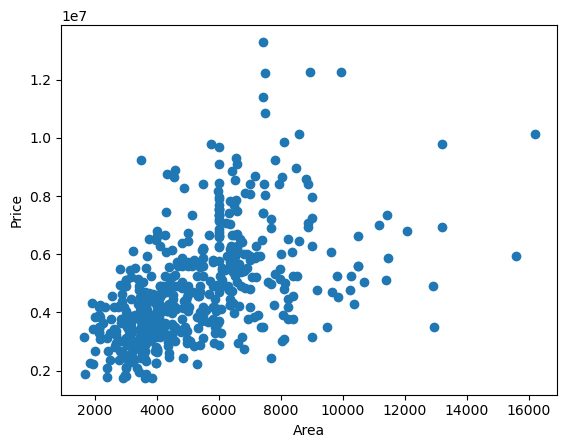

In [47]:
# Scatter plot of 'area' vs. 'price'
plt.scatter(data['area'], data['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10856\3386866311.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


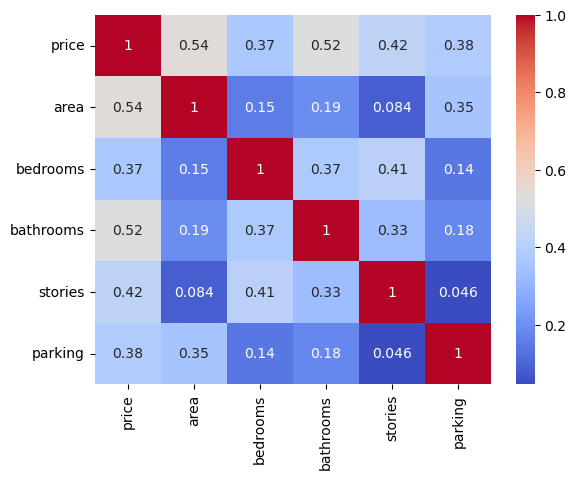

In [48]:
# Heatmap of correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

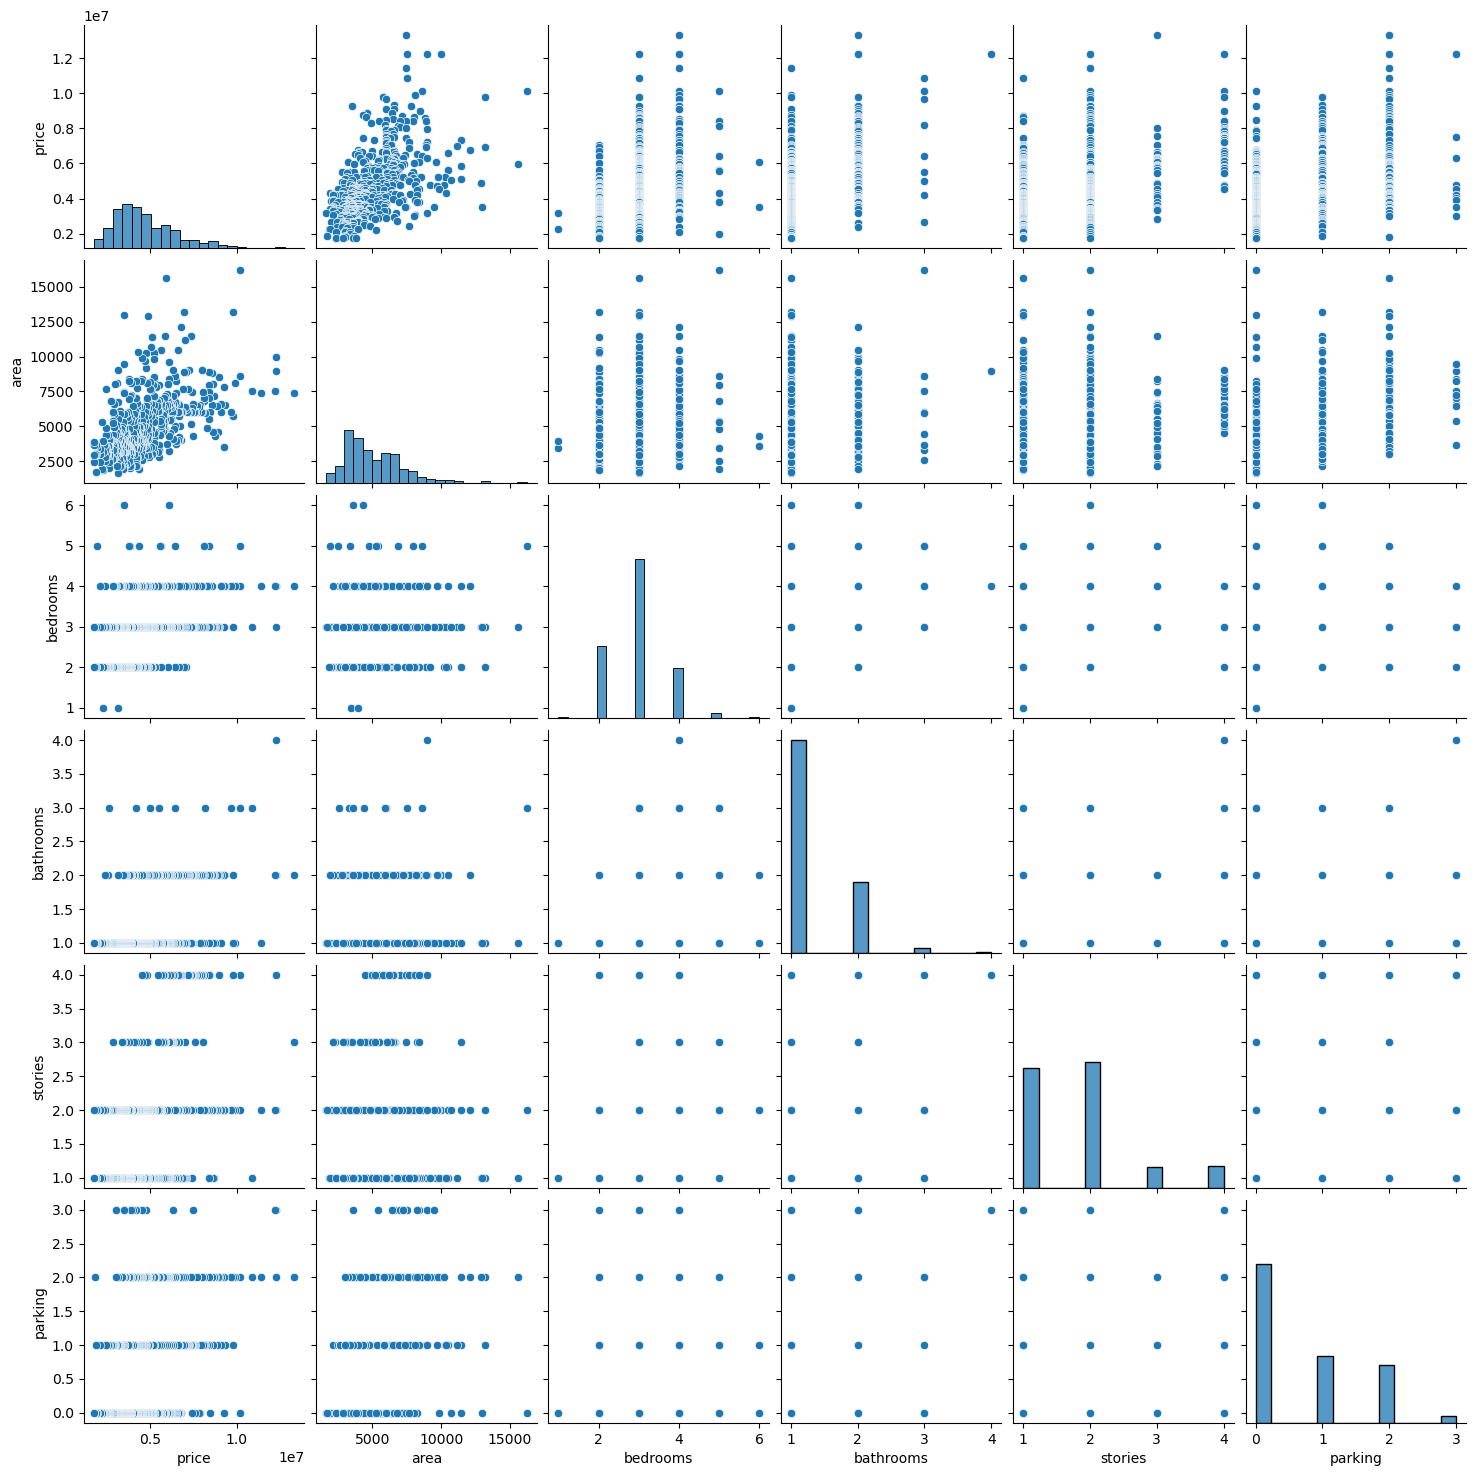

In [49]:
sns.pairplot(data)
plt.show()

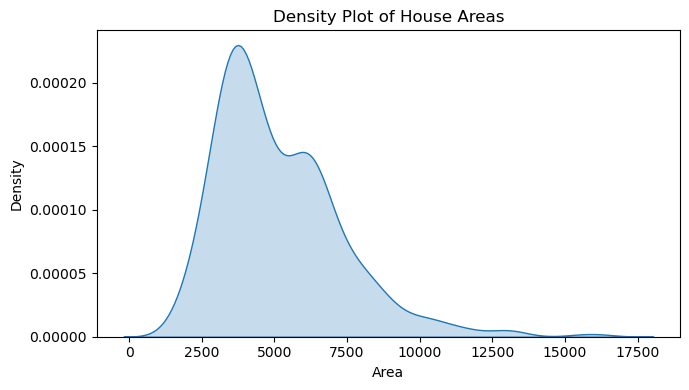

In [50]:
# Density Plot of 'area'
plt.figure(figsize=(7, 4))
sns.kdeplot(data['area'], fill=True )
plt.title('Density Plot of House Areas')
plt.xlabel('Area')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

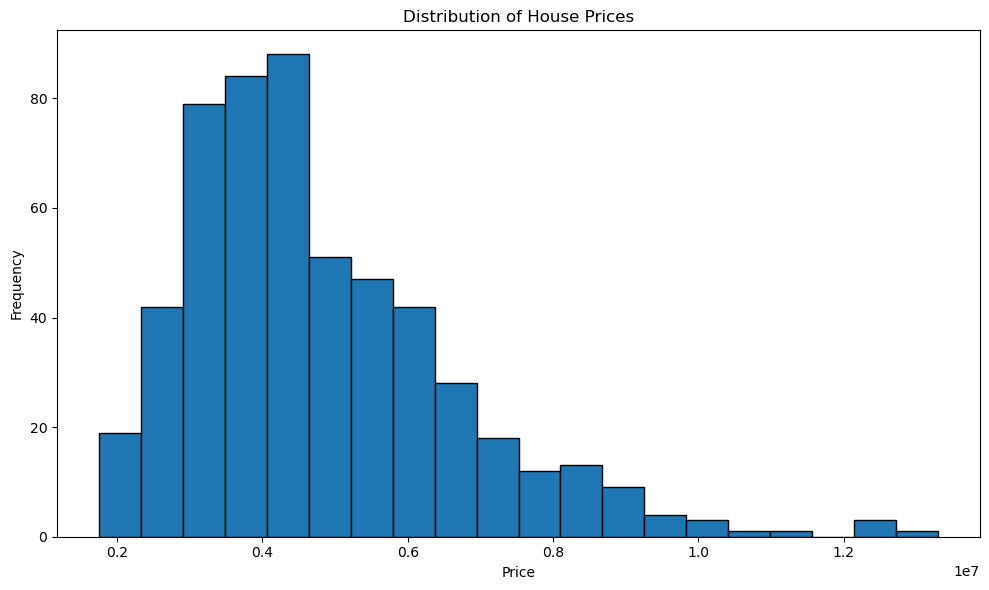

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=20, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# **Data Cleaning and Preparation**

Before we move further lets understand what all are the changes we have to make in our dataset to prepare it for modelling. Some columns in our dataset contains categorical variables with "yes" and "no" values. In such cases, it is often necessary to make changes to these columns for further analysis or modeling. Here are some inferences for handling these columns:

**1. Handling Binary Categorical Variables:**

Some columns like 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', and 'prefarea' have "yes" and "no" values.

We'll convert these into numbers: "yes" becomes 1, and "no" becomes 0.

This change helps us use them as binary variables for analysis and modeling.

**2. Creating Dummy Variables:**

The 'furnishingstatus' column shows how a house is furnished: "unfurnished", "semi-furnished", or "fully furnished".

To use this information in analysis and modeling, we'll create dummy variables.

Dummy variables are like switches: for each category, we'll have a new column where 1 means that category is present, and 0 means it's not.

This lets us include furnishing status as valuable data for our analysis.


### **1. Handling Binary Categorical Variables (Yes/No) Categories**

In [52]:
# List of categorical columns containing 'yes' and 'no' values
categorical_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [53]:
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [54]:
def binary_map(x):
    """
    Function to map 'yes' and 'no' values to 1 and 0, respectively.
    
    Parameters:
    x (pandas Series): Input Series containing 'yes' and 'no' values.
    
    Returns:
    pandas Series: Mapped Series with 'yes' mapped to 1 and 'no' mapped to 0.
    """
    return x.map({'yes': 1, 'no': 0})

In [55]:
# Apply the binary_map function to multiple categorical columns in the 'data' DataFrame
data[categorical_col] = data[categorical_col].apply(binary_map)

# Display the updated values of the categorical columns
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [56]:
# Display the first five rows of the DataFrame 'data' after the conversions
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### **2. Handling Categorical data with Dummy Variable**

In [57]:
# Generate dummy variables for the 'furnishingstatus' column
dummy_col = pd.get_dummies(data['furnishingstatus'])

# Display the first few rows of the dummy variables DataFrame
dummy_col.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


furnished will be 00 and to avoid redudency we drop it. semi-furnished will be 10 and unfurnished will be 01

In [58]:
# Regenerating dummy variables for the 'furnishingstatus' column, dropping the first category
dummy_col = pd.get_dummies(data['furnishingstatus'], drop_first=True)

# Display the first few rows of the dummy variables DataFrame
dummy_col.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


#### **Why dropped first category among three?**

When creating dummy variables for these categories, dropping the first category ('furnished') among the three would be appropriate. This is because we want to avoid the dummy variable trap or multicollinearity in regression models.

By dropping the first category, 'furnished', we create two dummy variables: 'semi-furnished' and 'unfurnished'. These two variables will capture the presence or absence of 'semi-furnished' and 'unfurnished' categories relative to the baseline category, which is 'furnished'.

Consider the following example:

Original 'furnishingstatus' column:

| Index | furnishingstatus |
|-------|-----------------|
| 0     | furnished       |
| 1     | semi-furnished  |
| 2     | unfurnished     |
| 3     | furnished       |
| 4     | semi-furnished  |


After creating dummy variables and dropping 'furnished':

| Index | semi-furnished | unfurnished |
|-------|----------------|-------------|
| 0     | 0              | 0           |
| 1     | 1              | 0           |
| 2     | 0              | 1           |
| 3     | 0              | 0           |
| 4     | 1              | 0           |


Here, the first row with 'semi-furnished' and 'unfurnished' as both 0 indicates that it corresponds to the dropped category 'furnished'. The presence or absence of 'semi-furnished' and 'unfurnished' is captured by the values in the respective dummy variables.

By dropping the first category, we ensure linear independence among the dummy variables, which helps avoid multicollinearity and allows for proper interpretation of the coefficients associated with each category in the regression model.


In [59]:
# Concatenate the original 'data' DataFrame with the 'dummy_col' DataFrame along columns
data = pd.concat([data, dummy_col], axis=1)

# Display the first few rows of the updated DataFrame
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [60]:
# Drop the 'furnishingstatus' column from the DataFrame
data.drop(['furnishingstatus'], axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# **Splitting data into Training and Testing data**

In [61]:
# To show the columns or features of our dataset
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [62]:
np.random.seed(0)

# Split the data into training and testing subsets
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [63]:
# Display the first few rows of the training subset
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [64]:
# Checking the shape of training set
df_train.shape

(381, 14)

In [65]:
# Display the first few rows of the testing subset
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [66]:
# Checking the shape of training set
df_test.shape

(164, 14)

# **Scaling Training Data: MinMaxScaler**

#### **Why to scale our data?**

1. **Equal Treatment of Features:** Scaling ensures that all features are treated equally, no matter their size or units. This prevents one feature from overshadowing others just because it has larger values.

2. **Avoid Biased Results:** Without scaling, algorithms might wrongly emphasize features with larger values, leading to skewed or incorrect predictions.

3. **Sensitive Algorithms:** Some algorithms (like linear regression, logistic regression, and k-nearest neighbors) are sensitive to unscaled data. Scaling helps these algorithms work properly and make more accurate predictions.

4. **Faster Optimization:** Scaling speeds up the process of finding the best model parameters. With scaled data, optimization algorithms converge more quickly to the optimal solution.

5. **Fair Distance Calculations:** Algorithms that use distances, such as k-means clustering or k-nearest neighbors, can be biased if features have different scales. Scaling ensures all features contribute fairly to distance calculations.

In [67]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

In [68]:
# List of columns to scale
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [69]:
# Scaling the specified columns in the training subset using the MinMaxScaler
df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])

In [70]:
# Displaying the training subset
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


# **Training the model**

In [71]:
# Separate the target variable from the training subset
y_train = df_train.pop('price')

# Extract the remaining features as the training data
x_train = df_train

In [72]:
# To display the first few rows of the target variable in the training subset
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [73]:
# Creating an instance of LinearRegression
linear_regression = LinearRegression()

In [74]:
# Fitting the Linear Regression model to the training data
linear_regression.fit(x_train, y_train)

LinearRegression()

In [75]:
# Retrieve the coefficients of the Linear Regression model
coefficients = linear_regression.coef_

# Print the coefficients
print(coefficients)

[ 0.23466354  0.04673453  0.19082319  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.00092052
 -0.03100561]


In [76]:
# Calculate the coefficient of determination (R²) for the Linear Regression model on the training data
score = linear_regression.score(x_train, y_train)

# Print the coefficient of determination (R²)
print(score)

0.6814893088451202


# **Scaling Test Data: MinMaxScaler**

MinMaxScaler is a data transformation technique that scales numerical features to a specific range, usually between 0 and 1. It works by subtracting the minimum value of the feature from each data point and then dividing the result by the range (difference between the maximum and minimum values). 

#### **Why to scale our data?**

1. **Equal Treatment of Features:** Scaling ensures that all features are treated equally, no matter their size or units. This prevents one feature from overshadowing others just because it has larger values.

2. **Avoid Biased Results:** Without scaling, algorithms might wrongly emphasize features with larger values, leading to skewed or incorrect predictions.

3. **Sensitive Algorithms:** Some algorithms (like linear regression, logistic regression, and k-nearest neighbors) are sensitive to unscaled data. Scaling helps these algorithms work properly and make more accurate predictions.

4. **Faster Optimization:** Scaling speeds up the process of finding the best model parameters. With scaled data, optimization algorithms converge more quickly to the optimal solution.

5. **Fair Distance Calculations:** Algorithms that use distances, such as k-means clustering or k-nearest neighbors, can be biased if features have different scales. Scaling ensures all features contribute fairly to distance calculations.

In [77]:
# List of columns to scale
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [78]:
# Scaling the specified columns in the testing subset using the MinMaxScaler
df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])

# **Testing our model**

In [79]:
# Separate the target variable from the testing subset
y_test = df_test.pop('price')

# Extract the remaining features as the testing data
x_test = df_test

In [80]:
# Make predictions on the testing data using the trained Linear Regression model
prediction = linear_regression.predict(x_test)

### **Checking R squared value**

In [81]:
# Calculate the coefficient of determination (R²) for the predictions
r2 = r2_score(y_test, prediction)

# **Comparing the actual and predicted values**

In [86]:
# Get the shape of y_test
y_test.shape

# Reshape y_test to a matrix with a single column
y_test_matrix = y_test.values.reshape(-1, 1)

In [87]:
# Creating a DataFrame with actual and predicted values
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': prediction.flatten()})

In [88]:
# Display the first 10 rows of the DataFrame
data_frame.head(10)

,actual,predicted
0,0.247651,0.202410
1,0.530201,0.374464
2,0.328859,0.305654
3,0.261745,0.293786
4,0.245638,0.258827
5,0.275168,0.189463
6,0.644295,0.499099
7,0.328859,0.297637
8,0.087248,0.122528
9,0.395973,0.316860


### **Plotting the Graph**

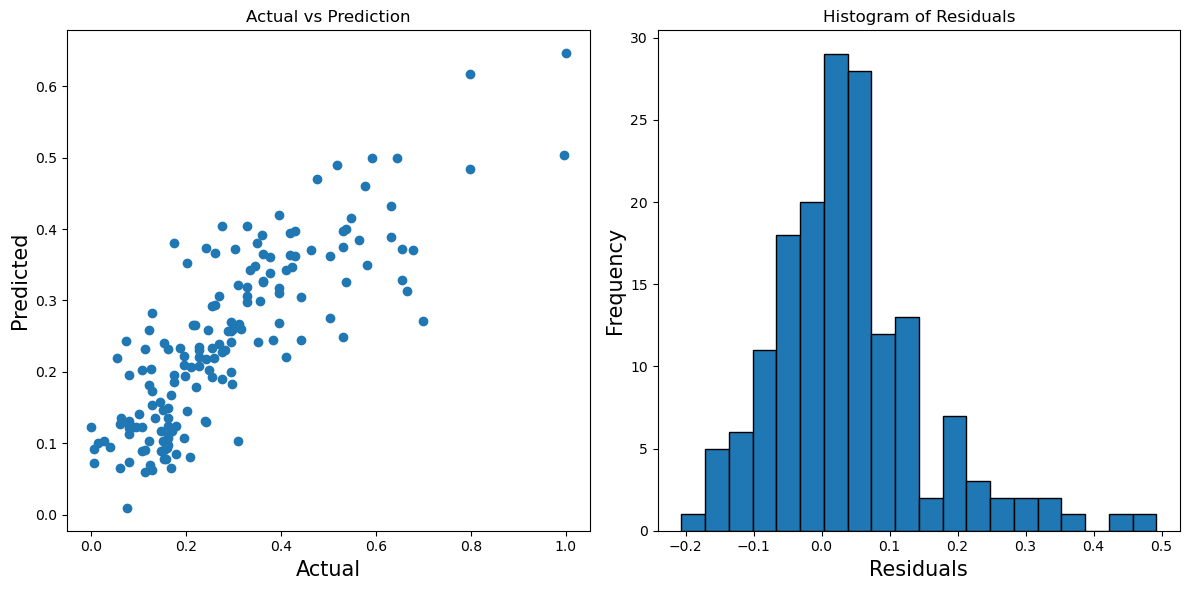

In [85]:
# Create a new figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot of actual versus predicted values on the first subplot
ax1.scatter(y_test, prediction)
ax1.set_title('Actual vs Prediction')
ax1.set_xlabel('Actual', fontsize=15)
ax1.set_ylabel('Predicted', fontsize=15)

# Create another plot (e.g., histogram of residuals) on the second subplot
residuals = y_test - prediction
ax2.hist(residuals, bins=20, edgecolor='black')
ax2.set_title('Histogram of Residuals')
ax2.set_xlabel('Residuals', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Conclusion

In this tutorial, we performed an in-depth Exploratory Data Analysis (EDA) on a house price dataset and built a linear regression model to predict house prices. 

We loaded and preprocessed the data, explored correlations and relationships using visualizations, selected relevant features based on EDA insights, built and trained a linear regression model, and evaluated its performance.

The linear regression model showed promise in predicting house prices based on the selected features. 

However, there is still room for improvement. 

Further steps could involve trying different regression algorithms, fine-tuning hyperparameters, and engineering new features for better performance. 

EDA and feature selection played a crucial role in understanding the data and building an initial predictive model.

Thank You!!!